In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import assembly_regression 

In [2]:
data = {'real_estate' : ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/Real%20estate.csv', ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores'], 'Y house price of unit area' ],
        'cancer_reg' : ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/cancer_reg.csv', ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 
                        'povertyPercent', 'studyPerCap', 'MedianAge', 'AvgHouseholdSize', 'PercentMarried', 'BirthRate', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace'], 'TARGET_deathRate'],
        'insurance_charge' : ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/insuranceCharge.csv', ['age', 'bmi', 'children'], 'charges'], 
        'bike' : ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/bike_hour.csv', ['hr', 'holiday', 'weathersit', 'temp', 'atemp','hum', 'windspeed'], 'cnt'],
         }

In [3]:
print(data)

{'real_estate': ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/Real%20estate.csv', ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores'], 'Y house price of unit area'], 'cancer_reg': ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/cancer_reg.csv', ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'AvgHouseholdSize', 'PercentMarried', 'BirthRate', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace'], 'TARGET_deathRate'], 'insurance_charge': ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/insuranceCharge.csv', ['age', 'bmi', 'children'], 'charges'], 'bike': ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/bike_hour.csv', ['hr', 'holiday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], 'cnt']}


In [105]:
from sklearn.preprocessing import StandardScaler # MB use in the future
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn import metrics

def reg_train(x_train, y_train):
        """
        Returns trained  regression models 
        """
        estimators = dict()
        
        estimators['svr'] = SVR()
        params = {'epsilon':[0.1, 0.01, 0.2, 0.5]}
    
        estimators['svr'] = GridSearchCV(estimators['svr'], params)
        estimators['svr'].fit(x_train, y_train)

        estimators['rfr'] = RandomForestRegressor()
        params = {'max_depth':[1, 1.5, 0.5, 0.1, 2, 5]}
        estimators['rfr'] = GridSearchCV(estimators['rfr'], params)
        estimators['rfr'].fit(x_train, y_train)

        estimators['dtr'] = DecisionTreeRegressor()
        #params = {'criterion':['squared_error', 'friedman_mse', 'absolute_error']}
        params = {'max_depth':[1, 1.5, 0.5, 0.1, 2, 5]}
        estimators['dtr'] = GridSearchCV(estimators['dtr'], params)
        estimators['dtr'].fit(x_train, y_train)

        estimators['lin'] = LinearRegression()
        params = {'fit_intercept':[True, False]}
        estimators['lin'] = GridSearchCV(estimators['lin'], params)
        estimators['lin'].fit(x_train, y_train)

        return estimators

def reg_scoring(y, yhat):
    """
    Returns regression scores
    """
    scores = dict()
    scores['mae'] = metrics.mean_absolute_error(y, yhat)
    scores['mse'] = metrics.mean_squared_error(y, yhat)
    scores['rmse'] = scores['mse']**(0.5) 
    return scores

def reg_prediction(df, df_competition, line):
    """
    Dewscribe lo que hace la funcion
    :param df:
    :type df:
    :param df_competition:
    :type df_competition:
    :param line:
    :type line:
    :return:
    :rtype:
    """
    # Declare the vars
    errors = dict()
    errors = {'svr':[], 'lin': [], 'dtr':[], 'rfr':[]} # create dictionary to gather error scores for estimators
    target_column = ['Y house price of unit area','TARGET_deathRate','charges','cnt','IBM common stock closing prices']
    
    ######### TRAIN THE MODEL ###########
    x_train = df.drop(columns = [target_column[line]])
    y_train = df[target_column[line]]
    estimators = reg_train(x_train, y_train) # train estimators

    ######### TEST THE MODEL ###########
    x_competition = df_competition.drop(columns = [target_column[line]])
    y_competition = df_competition[target_column[line]]
    for ydx, y in enumerate(x_competition.iterrows()):
      for est in estimators.keys():
        y_est = estimators[est].predict([x_competition.iloc[ydx]]) # predict with individual estimator
        ######### SCORE THE MODEL ###########
        errors[est].append(reg_scoring(y=[y_competition.iloc[ydx]], yhat=y_est)['rmse']) # calculate an error of individual estimator

    # return the data
    return errors



In [5]:
results = {'assembly': [],'estimators': []}
columns_to_drop = [[],['Geography','binnedInc'],['sex','smoker','region'],['instant','dteday']]

for model in results.keys():
    for idx, el in enumerate(data):
        df = pd.read_csv(data[el][0], encoding = "ISO-8859-1")
        df.drop(columns = columns_to_drop[idx],inplace = True)
        df = df.dropna()
        ds, competition = train_test_split(df, test_size = 0.2)
        ds = ds.reset_index(drop = True)
        competition = competition.reset_index(drop = True)
        print(el)
        
        if model == 'assembly':
            results[model].append(assembly_regression.analyze_assembly(learning_ds=ds,competition_ds=competition, X=data[el][1], Y=data[el][2])[0]['rmse'])
        else:
            results[model].append(reg_prediction(ds,competition,idx))

real_estate
cancer_reg
insurance_charge
bike
real_estate
cancer_reg
insurance_charge
bike


In [81]:
results

           0          1             2           3
0  11.678041  19.958374  11202.445929  112.581369


                  0          1             2           3
assembly  11.678041  19.958374  11202.445929  112.581369
         svr       lin        dtr       rfr
0  10.790347  7.027986  12.796454  8.831869
1   5.566562  5.685039   0.638202  0.229434
2   1.785932  3.184493   3.261798  4.918326
3   6.446207  5.452425   6.096454  5.997598
4   4.628220  4.688880   8.603546  0.103507
             svr        lin        dtr        rfr
count  83.000000  83.000000  83.000000  83.000000
mean    7.370786   6.286417   6.100305   5.276178
std     6.913943   6.053928   6.684971   6.460478
min     0.117509   0.093420   0.061798   0.036495
25%     2.442763   2.664397   1.713744   1.841539
50%     5.566562   5.154712   4.303546   3.509302
75%    10.367058   7.612548   7.846454   6.481426
max    35.645103  34.610729  37.796454  34.978738
svr          7.370786
lin          6.286417
dtr          6.100305
rfr          5.276178
assembly    11.678041
dtype: float64
cd= 3.049744045628256


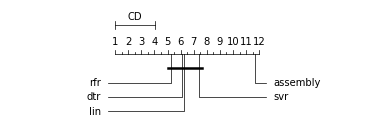

         svr        lin        dtr        rfr
0  16.612468   5.456359   2.959146  10.445752
1   5.497650   9.756581  14.259146   0.162481
2  50.267774  30.051019  30.740854  28.110742
3  35.373171  23.462840  25.397101  13.236838
4   1.407932  15.821300  18.459146   4.966894
              svr         lin         dtr         rfr
count  119.000000  119.000000  119.000000  119.000000
mean    18.005502   13.932095   18.610180   13.740402
std     14.175517   12.162251   16.192608   12.093911
min      0.769062    0.035487    0.356818    0.162481
25%      7.400244    5.523471    6.057982    5.188009
50%     14.481030   10.876511   12.581026   10.445752
75%     23.772793   18.043491   27.120086   19.445766
max     74.374025   67.962655   75.756818   64.609904
svr         18.005502
lin         13.932095
dtr         18.610180
rfr         13.740402
assembly    19.958374
dtype: float64
cd= 3.049744045628256


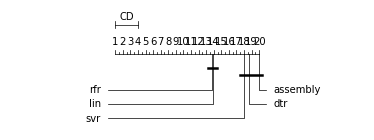

           svr          lin           dtr          rfr
0  6783.323089  6008.686802  10277.198977  7880.866970
1  6786.178892  5951.804779   5363.916726  5975.390542
2   154.554833  6261.674027   3514.516477   464.387841
3  6590.789318  2818.764115   5147.586226  5714.797919
4  4635.867032  9307.445450   8069.311427  8664.527233
                svr           lin           dtr           rfr
count    268.000000    268.000000    268.000000    268.000000
mean    7923.442373   8766.343555   8826.184998   8750.681274
std     9291.905364   6381.730001   6758.644134   6552.506294
min       74.273423    211.005600    504.800707    464.387841
25%     2302.478748   5426.837610   4824.572418   5113.752509
50%     4929.035643   6880.908995   7074.123130   6713.583373
75%     7666.115188   9252.294684  10221.193740   9509.485558
max    39272.416909  31904.064606  32248.984295  33755.332690
svr          7923.442373
lin          8766.343555
dtr          8826.184998
rfr          8750.681274
assembly    

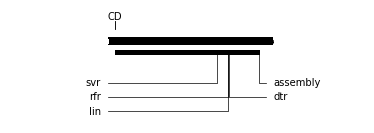

        svr           lin        dtr        rfr
0  0.426400  2.842171e-14  16.320732  13.611142
1  1.955711  2.984279e-13   2.874235   1.858489
2  0.762841  1.776357e-14   3.660485   0.193664
3  2.782093  2.842171e-14   5.847042   9.095209
4  2.490955  8.526513e-14   4.433790   1.670130
               svr           lin          dtr          rfr
count  3476.000000  3.476000e+03  3476.000000  3476.000000
mean      4.203336  1.224874e-13    15.920608    11.121759
std      19.711376  1.180246e-13    17.036989    11.652289
min       0.000107  0.000000e+00     0.041591     0.007161
25%       0.532995  3.463896e-14     3.339515     2.923592
50%       1.331510  1.056932e-13     9.556886     7.076408
75%       2.419697  1.705303e-13    22.679268    15.803259
max     405.788846  9.094947e-13   128.307190    98.956670
svr         4.203336e+00
lin         1.224874e-13
dtr         1.592061e+01
rfr         1.112176e+01
assembly    1.125814e+02
dtype: float64
cd= 3.049744045628256


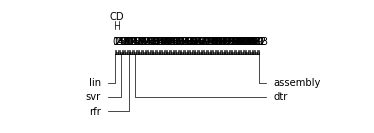

In [96]:
import Orange
import matplotlib.pyplot as plt

df_resultsAsm = pd.DataFrame.from_dict({'assembly': results['assembly']})
df_resultsAsm = pd.DataFrame.transpose(df_resultsAsm)
print(df_resultsAsm.head())

for i,_ in enumerate(data):
    df_results = pd.DataFrame.from_dict(results['estimators'][i])
    print(df_results.describe())
    
    names = list(df_results.columns.values)
    names.append('assembly')
    avranks = df_results.mean()
    avranks = avranks.append(pd.Series(df_resultsAsm[i], index=['assembly']))
    print(avranks)
    cd = Orange.evaluation.compute_CD(avranks, 4,alpha="0.05") #tested on 4 datasets 
    print("cd=",cd)
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.5)
    plt.show();

In [106]:
ts_data = {'real_estate' : ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/Real%20estate.csv', 'Y house price of unit area'], 
           'cancer_reg' : ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/cancer_reg.csv', 'TARGET_deathRate'], 
           'insurance_charge' : ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/insuranceCharge.csv', 'charges'], 
           'bike' : ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/Regression/bike_hour.csv', 'cnt'], 
           'ibm' : ['https://raw.githubusercontent.com/PacktPublishing/Practical-Time-Series-Analysis/master/Data%20Files/ibm-common-stock-closing-prices.csv', 'IBM common stock closing prices'], 
           #'precipitation' : ['https://raw.githubusercontent.com/ostapkharysh/PublicDatasets/master/TimeSeries/halfhourly-precipitation-and-str.csv', 'Flow']
}


In [107]:
ts_results = {'assembly': [],'estimators': []}
columns_to_drop = [[],['Geography','binnedInc'],['sex','smoker','region'],['instant','dteday'],[]]

def make_dataset_from_ts(d, num_x=10, value=None):
    for idx in range(num_x):
        d['t-' + str(idx+1)] = d[value].shift(+(idx+1))
    return d[num_x:]

In [108]:
for model in ts_results.keys():
    for idx, el in enumerate(ts_data):
        Y = ts_data[el][1]
        df = pd.read_csv(ts_data[el][0], encoding="ISO-8859-1")
        df = make_dataset_from_ts(df[[Y]], value=Y) #TS

        if el =='ibm':
            df = df[:-1] #THERE WAS A NAN in the last column during the reading
            df = df[df[Y].notna()] # There were still some ones in the
            df[Y] = pd.to_numeric(df[Y])
        elif el =='precipitation':
            df = df[:-2] #THERE WAS A NAN and String in the last columns during the reading
            df = df[df[Y].notna()] # There were still some ones in the
            df[Y] = pd.to_numeric(df[Y])

        X = list(df.columns[1:]) #TS
        ds, competition = train_test_split(df, test_size=0.2)
        ds = ds.reset_index(drop=True)
        competition = competition.reset_index(drop=True)
        print(el)
        
        if model == 'assembly':
            ts_results[model].append(assembly_regression.analyze_assembly(learning_ds=ds, competition_ds=competition, X=X, Y=Y)[0]['rmse']) 
        else:
            ts_results[model].append(reg_prediction(ds,competition,idx))

<ipython-input-107-af67761b0430>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['t-' + str(idx+1)] = d[value].shift(+(idx+1))


real_estate


<ipython-input-107-af67761b0430>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['t-' + str(idx+1)] = d[value].shift(+(idx+1))


cancer_reg


<ipython-input-107-af67761b0430>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['t-' + str(idx+1)] = d[value].shift(+(idx+1))


insurance_charge


<ipython-input-107-af67761b0430>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['t-' + str(idx+1)] = d[value].shift(+(idx+1))


bike
ibm


<ipython-input-107-af67761b0430>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['t-' + str(idx+1)] = d[value].shift(+(idx+1))


real_estate


<ipython-input-107-af67761b0430>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['t-' + str(idx+1)] = d[value].shift(+(idx+1))


cancer_reg


<ipython-input-107-af67761b0430>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['t-' + str(idx+1)] = d[value].shift(+(idx+1))


insurance_charge


<ipython-input-107-af67761b0430>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['t-' + str(idx+1)] = d[value].shift(+(idx+1))


bike
ibm


In [117]:
ts_results

{'assembly': [14.042393646029964,
  25.561662427713937,
  11764.97954561299,
  39.78021678421468,
  9.58935405126061],
 'estimators': [{'svr': [16.08978139112525,
    6.629619965755083,
    22.152838325311418,
    1.917323085233022,
    14.535676256575229,
    20.030732605242893,
    7.679436796262287,
    3.96295803264168,
    9.741628833089042,
    5.813340489996477,
    13.649619161205045,
    1.3957958122278171,
    1.2502551144208311,
    11.232932080207611,
    1.2845123124811977,
    8.983013279556669,
    9.806948439406085,
    2.166271489426734,
    14.197540225805739,
    16.267698643193,
    8.788542190206101,
    8.045605477069373,
    5.473824073511615,
    9.25978796885407,
    15.935778782903512,
    11.840285627741252,
    16.103589495930137,
    4.245601610231304,
    3.6680156275804023,
    7.635740920614303,
    22.230523438293602,
    14.134842885262088,
    20.195600882715425,
    7.925256088072469,
    3.269721835344207,
    2.559622437249587,
    1.92663295151450

                  0          1             2          3         4
assembly  14.042394  25.561662  11764.979546  39.780217  9.589354
             svr        lin        dtr        rfr
count  81.000000  81.000000  81.000000  81.000000
mean    9.486243   9.627662   9.407977   9.403199
std     6.893758   7.163428   6.871886   6.875827
min     0.299752   0.061011   0.240557   0.205378
25%     3.208338   3.319267   3.159443   3.194622
50%     8.045605   9.274040   8.559443   8.594622
75%    15.935779  15.577810  15.140557  15.105378
max    26.920110  27.640733  25.659443  25.694622
svr          9.486243
lin          9.627662
dtr          9.407977
rfr          9.403199
assembly    14.042394
dtype: float64
cd= 2.727774


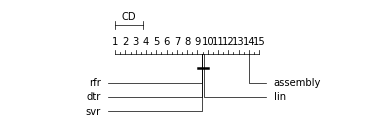

              svr         lin         dtr         rfr
count  608.000000  608.000000  608.000000  608.000000
mean    19.212029   18.633492   20.529220   19.019719
std     16.374170   15.482798   16.905562   15.856456
min      0.022811    0.021238    0.010564    0.043518
25%      7.122978    7.121890    8.464448    7.367083
50%     15.743125   14.444121   15.620000   15.227749
75%     26.974839   26.380891   29.535564   26.695622
max    126.522833  124.644558  118.480000  125.157880
svr         19.212029
lin         18.633492
dtr         20.529220
rfr         19.019719
assembly    25.561662
dtype: float64
cd= 2.727774


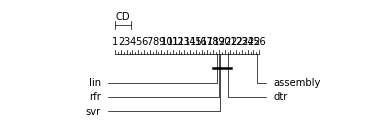

                svr           lin           dtr           rfr
count    266.000000    266.000000    266.000000    266.000000
mean    7705.458089   9017.187006   8798.195665   8954.037902
std     8826.644228   7552.829823   7439.191582   7579.185263
min       86.157597     19.299296     41.755553     15.688814
25%     2716.480441   4079.148120   4319.691197   4044.854990
50%     4794.398846   7969.364234   8099.623325   7888.295462
75%     7886.889931  11063.240810  10840.958747  10866.297039
max    52962.946456  49327.023261  49018.270043  49560.334369
svr          7705.458089
lin          9017.187006
dtr          8798.195665
rfr          8954.037902
assembly    11764.979546
dtype: float64
cd= 2.727774


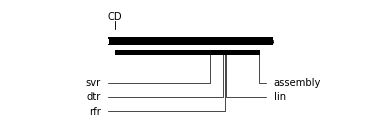

               svr          lin          dtr          rfr
count  3474.000000  3474.000000  3474.000000  3474.000000
mean     54.270877    54.896254    47.524095    43.224021
std      72.064787    61.560704    54.428414    47.234384
min       0.028787     0.021339     0.013530     0.002542
25%      13.285545    17.056296    10.391258    10.136637
50%      30.395145    36.207821    28.642643    26.172340
75%      60.261933    66.805803    65.605991    60.614294
max     596.202285   452.669543   467.645514   371.051603
svr         54.270877
lin         54.896254
dtr         47.524095
rfr         43.224021
assembly    39.780217
dtype: float64
cd= 2.727774


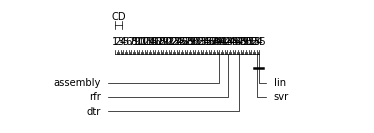

              svr         lin         dtr         rfr
count  200.000000  200.000000  200.000000  200.000000
mean    11.768620    3.531984    4.368624    3.839642
std     16.171202    3.171753    3.815617    3.762348
min      0.150175    0.008525    0.022059    0.005351
25%      2.893952    1.248374    1.723380    1.167371
50%      5.977698    2.667810    3.292549    2.926564
75%     11.859783    4.949823    6.035613    5.398838
max     86.110599   19.487905   23.472222   29.587572
svr         11.768620
lin          3.531984
dtr          4.368624
rfr          3.839642
assembly     9.589354
dtype: float64
cd= 2.727774


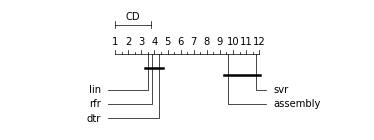

In [118]:
import Orange
import matplotlib.pyplot as plt

dfts_resultsAsm = pd.DataFrame.from_dict({'assembly': ts_results['assembly']})
dfts_resultsAsm = pd.DataFrame.transpose(dfts_resultsAsm)
print(dfts_resultsAsm.head())

for i,_ in enumerate(ts_data):
    dfts_results = pd.DataFrame.from_dict(ts_results['estimators'][i])
    print(dfts_results.describe())
    
    names = list(dfts_results.columns.values)
    names.append('assembly')
    avranks = dfts_results.mean()
    avranks = avranks.append(pd.Series(dfts_resultsAsm[i], index=['assembly']))
    print(avranks)
    cd = Orange.evaluation.compute_CD(avranks, 5,alpha="0.05") #tested on 5 datasets 
    print("cd=",cd)
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.5)
    plt.show();